In [1]:
import numpy as np
import matplotlib.pyplot as plt

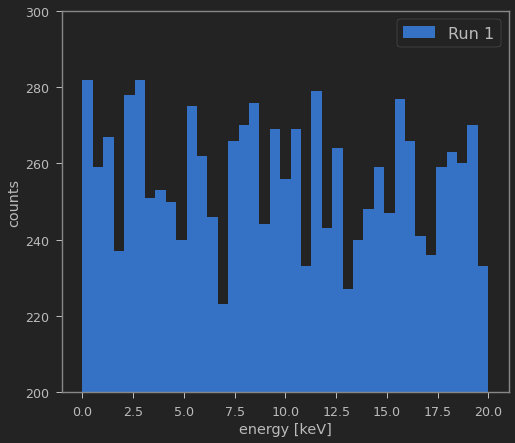

In [2]:
rv_seed = 0
np.random.seed(rv_seed)

e_min = 0.0
e_max = 20.0
lambda_b = int(1.e4)

energies = np.random.uniform(e_min, e_max, lambda_b)
bin_edges = np.linspace(e_min, e_max, 40)
plt.hist(energies, bins=bin_edges, label="Run 1")
plt.ylim([200, 300])
plt.xlabel("energy [keV]")
plt.ylabel("counts")
plt.legend(fontsize=16)
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

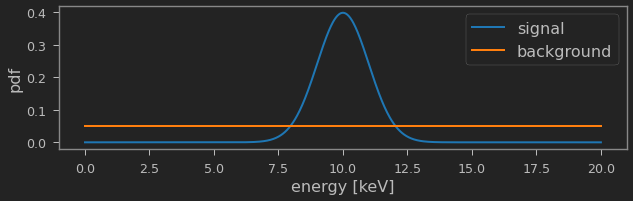

In [4]:
fig, ax = plt.subplots(figsize=(9, 3)) 

e_min = 0
e_max = 20

x_vals = np.linspace(e_min, e_max, 1000)

mu = 10
sigma = 1
signal_pdf_vals = norm.pdf(x_vals, mu, sigma)
bkg_pdf_vals = uniform.pdf(x_vals, e_min, e_max)

ax.plot(x_vals, signal_pdf_vals, linewidth=2, color='tab:blue', label='signal')
ax.plot(x_vals, bkg_pdf_vals, linewidth=2, color='tab:orange', label='background')

ax.set_xlabel("energy [keV]", fontsize=16)
ax.set_ylabel("pdf", fontsize=16)
ax.legend(fontsize=16)
plt.tight_layout()
plt.show()



In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

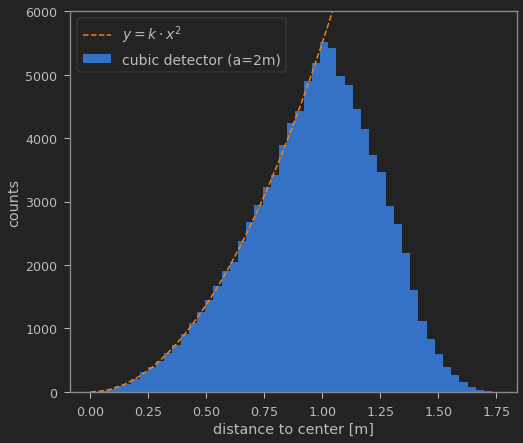

In [6]:
xmin = -1
xmax = 1

rv_seed = 0
np.random.seed(0)

ntot = int(1.e5)
ndim = 3
obs_coords = np.random.uniform(xmin, xmax, (ntot, ndim))
obs_dists = np.sqrt(np.sum(obs_coords**2, axis=1))

bin_edges = np.linspace(0, np.sqrt(3), 50)
counts, _ , _ = plt.hist(obs_dists, bins=bin_edges, label="cubic detector (a=2m)")

plt.ylim([0, 6000])
plt.xlabel("distance to center [m]")
plt.ylabel("counts")

x = np.linspace(0.0, 1.75, 1000)
y = x**2 * np.amax(counts)
plt.plot(x,y, color='tab:orange', linestyle='dashed', label="$y=k\cdot x^2$")

plt.legend(fontsize=14)
plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt

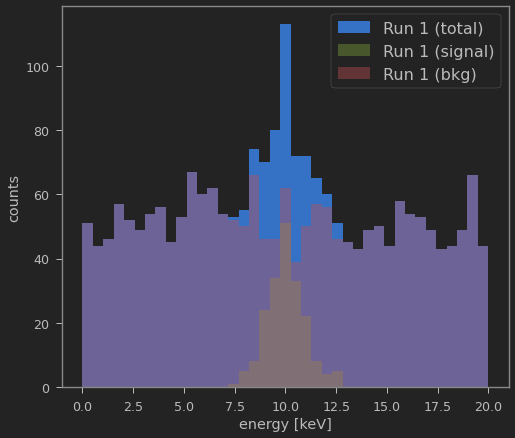

In [8]:
lambda_s = 200
lambda_b = 2000

mu = 10
sigma = 1
x_min = 0
x_max = 20

rv_seed = 0
np.random.seed(rv_seed)

ntot = np.random.poisson(lambda_s + lambda_b)

# First step generate random numbers between 0 and 1 and attribute each
# event to signal or background using based on the ratio between
# signal rate and total rate
alpha = lambda_s / (lambda_s + lambda_b)
temp_rvars = np.random.uniform(0,1, ntot)
idx_s = np.where(temp_rvars < alpha)[0]
idx_b = np.where(temp_rvars >= alpha)[0]

# Second step. Store in "samples" the energy value of each event
samples = np.zeros(ntot)
# draw samples that are realized as background events from the background distribution 
samples[idx_b] = np.random.uniform(x_min, x_max, len(idx_b))
# draw samples that are realized as signal events from the signal distribution 
samples[idx_s] = np.random.normal(mu, sigma, len(idx_s))

bin_edges = np.linspace(x_min, x_max, 40)
plt.hist(samples, bins=bin_edges, label="Run 1 (total)")
plt.hist(samples[idx_s], bins=bin_edges, label="Run 1 (signal)", alpha=0.4)
plt.hist(samples[idx_b], bins=bin_edges, label="Run 1 (bkg)", alpha=0.4)
plt.xlabel("energy [keV]")
plt.ylabel("counts")
plt.legend(fontsize=16)
plt.show()


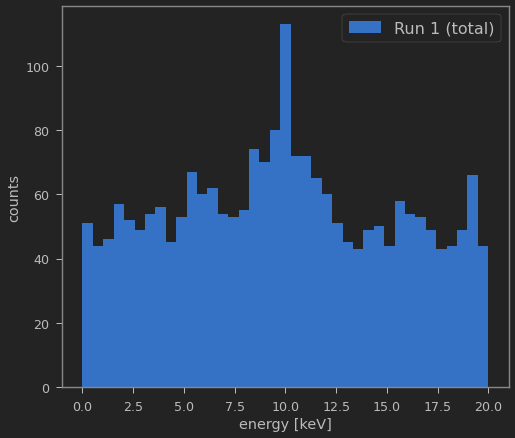

In [9]:
bin_edges = np.linspace(x_min, x_max, 40)
plt.hist(samples, bins=bin_edges, label="Run 1 (total)")
plt.xlabel("energy [keV]")
plt.ylabel("counts")
plt.legend(fontsize=16)
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

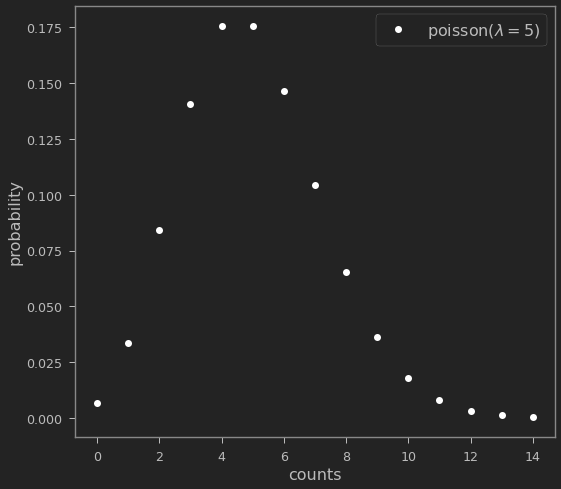

In [11]:
counts = np.arange(0,15)

mu = 5 
probs = poisson.pmf(counts, mu)
plt.plot(counts, probs, "wo", label='poisson($\\lambda=5$)')
plt.xlabel("counts", fontsize=16)
plt.ylabel("probability", fontsize=16)
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()

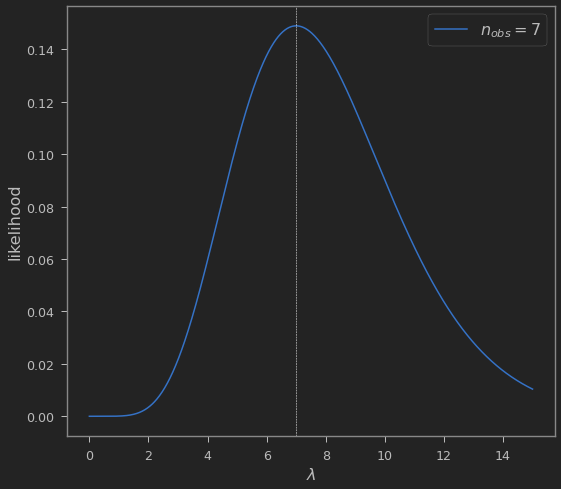

In [12]:
counts_obs = 7
xvals = np.linspace(0.0, 15, 1000)

def likelihood(mu):
    return poisson.pmf(counts_obs, mu)

yvals = likelihood(xvals)

plt.plot(xvals, yvals, label='$n_{obs}=7$')
plt.axvline(x=counts_obs, color='white', linestyle='dashed', linewidth=0.5)
plt.xlabel("$\lambda$", fontsize=16)
plt.ylabel("likelihood", fontsize=16)
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()

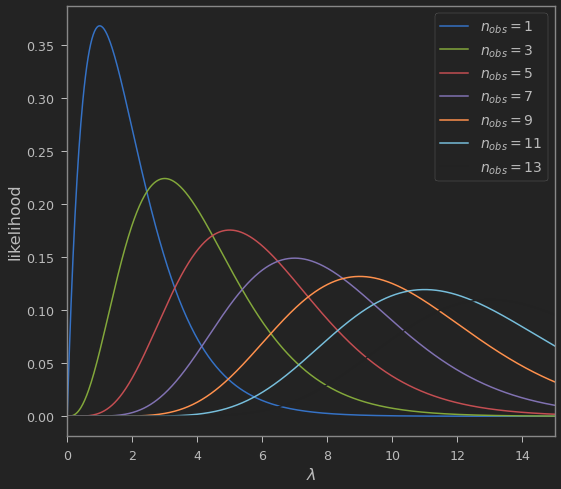

In [13]:
xvals = np.linspace(0, 20, 1000)

counts_obs = np.arange(1, 15)[::2]
likelihoods = [lambda x, obs=c: poisson.pmf(obs, x) for c in counts_obs]

for obj in zip(counts_obs, likelihoods):
    cobs, likelihood = obj
    
    yvals = likelihood(xvals)
    plt.plot(xvals, yvals, label=f'$n_{{obs}}={cobs}$')

plt.xlim([0.0, 15])
plt.xlabel("$\lambda$", fontsize=16)
plt.ylabel("likelihood", fontsize=16)
plt.legend(fontsize=14)
plt.tight_layout()

10.57, 10.57


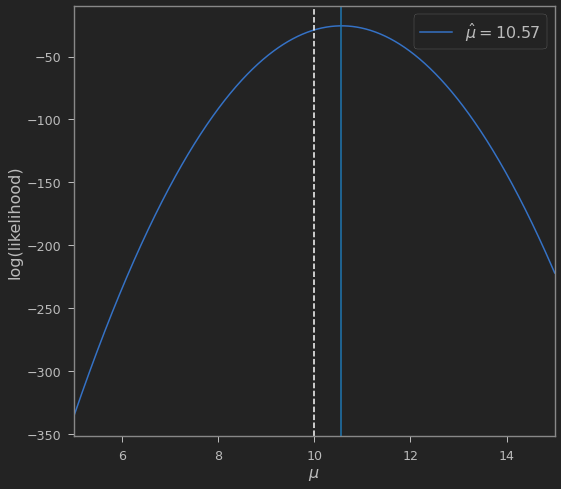

In [14]:
from scipy.stats import norm

rv_seed = 0
np.random.seed(rv_seed)

N = 20
mu0 = 10
sigma0 = 1
random_sample = np.random.normal(mu0, sigma0, N)

# we can skip constants that do not depend on mu
def logL(mu, sigma = sigma0, sample = random_sample):
    return np.sum(norm.logpdf(sample, mu, sigma))

xvals = np.linspace(5,15, 1000)
yvals = [logL(x) for x in xvals]
xmax = xvals[np.argmax(yvals)]

plt.plot(xvals, yvals, label=f'$\hat{{\mu}}={xmax:.2f}$')

plt.xlim([5.0, 15])
plt.xlabel("$\mu$", fontsize=16)
plt.ylabel("log(likelihood)", fontsize=16)
plt.axvline(x=mu0, color='white', linestyle='dashed')
plt.axvline(x=xmax, color='tab:blue', linestyle='solid')
plt.legend(fontsize=16)
plt.tight_layout() 
   
print(f'{np.mean(random_sample):.2f}, {xmax:.2f}')